In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt

## 기초자산의 변화 함수 모델링
- 기초자산의 변화 = 임의 숫자 X 시간변화 반영을 위한 스케일링 변수
- dS = eps*(dt)^(1/2)

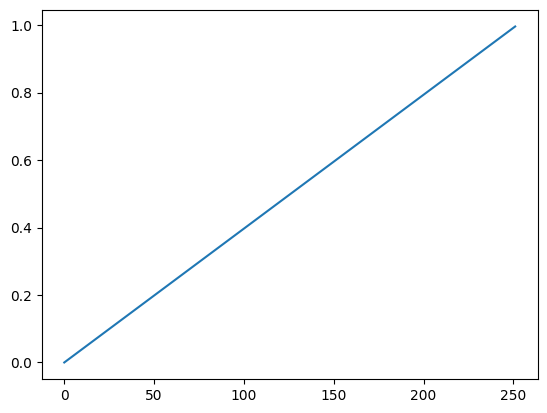

In [2]:
# 기초자산의 변화 함수 모델링

# 내부변수 "시간 데이터" 생성
## 1년
T = 1

## 252일
N = T*252
dt = T/N 

## 시간 정보
t = [i for i in np.arange(0, T, dt)]

plt.plot(t)
plt.show()

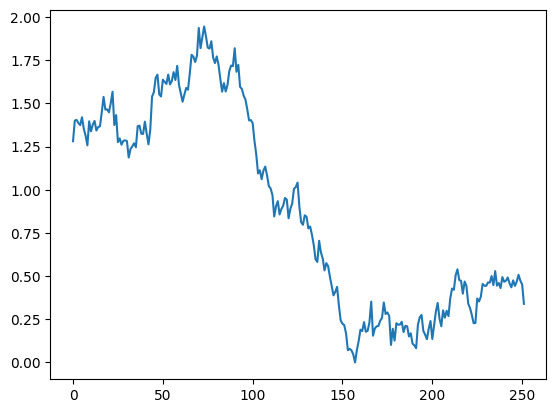

In [3]:
# 기초자산 "주식(Stock)" 움직임 생성
dS = np.random.randn(N)*np.sqrt(dt) # 임의의 값을 랜덤으로 부여
S = np.cumsum(dS) # dS의 누적합
S = S - S.min()
plt.plot(S)
plt.show()

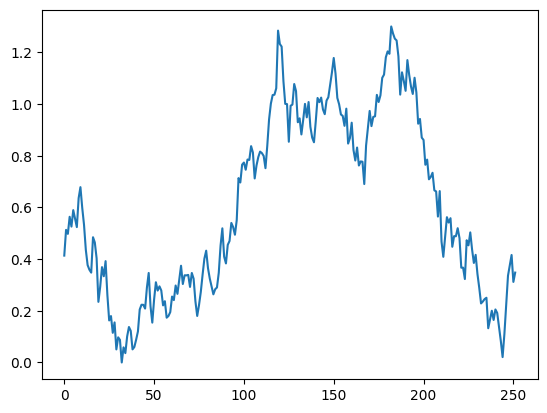

In [15]:
def stock_movement(T):
    N = T*252
    dt = T/N
    dS = np.random.randn(N)*np.sqrt(dt)
    S = np.cumsum(dS)
    S = S - S.min()

    return S
    
T = 1
S = stock_movement(T)
plt.plot(S)

## 선물 가격 모델링
- 선물 가격 =  기초자산 가격*만기까지 남은 시간에 따른 이자 반영
- F = S*e^{(r-d)*T}

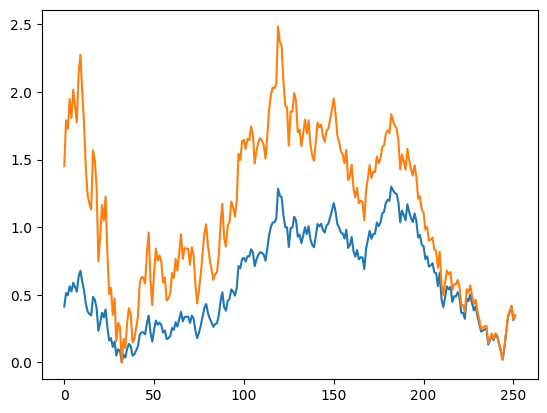

In [16]:
# 주식 가격을 입력하면, 선물 가격을 출력하는 함수 생성 및 실행
def future_price(S, r, d):
    '''
    [inputs]
        - S : 주식 가격
    '''
    F = []
    for time, S_day in enumerate(S):
        t_ramain = S.shape[0] - (time +1)
        F_day = S_day*np.exp((r-d)*t_ramain)
        F.append(F_day)

    return F

F = future_price(S, 0.02, 0.015)
SF = pd.concat([pd.DataFrame(S, columns=['Stock']), pd.DataFrame(F, columns=['Future'])], axis=1)

plt.plot(SF)
plt.show()

# 블랙-숄즈 방정식
- 블랙-숄즈 방정식은 구매가, 현재가, 기간, 이자율, 유동성으로 예상 가격을 계산
- C (Call option price) = S*N(d1)-K*e^(-r*T)*N(d2)
- P (Put option price) = -S*N(-d1)+K*e^(-r*T)*N(-d2)

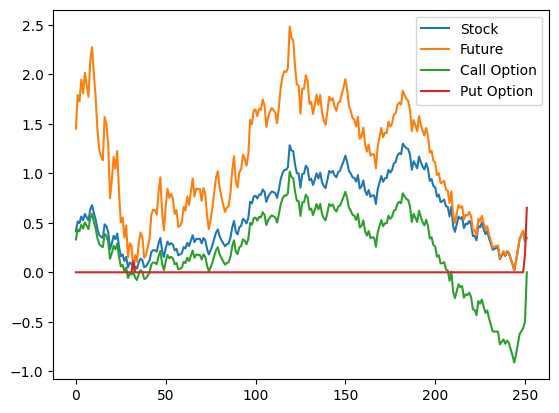

In [17]:
def option_price(S, K, r, sigma, option_type):
    OV = []
    for time, S_day in enumerate(S):
        t_remain = S.shape[0] - (time+1)
        d1 = (np.log(S_day/K) + (r+0.5*sigma**2) + t_remain)/(sigma*np.sqrt(t_remain))
        d2 = d1 - sigma + np.sqrt(t_remain)

        if option_type == 'call':
            OV_day = S_day*stat.norm.cdf(d1) - K*np.exp(-r*t_remain)*stat.norm.cdf(d2)
        else:
            OV_day = -S_day*stat.norm.cdf(-d1) + K*np.exp(-r*t_remain)*stat.norm.cdf(-d2)

        OV.append(OV_day)

    return OV

C = option_price(S, 1, 0.01, 0.25, 'call')
P = option_price(S, 1, 0.01, 0.25, 'put')
SFCP = pd.concat([pd.DataFrame(S, columns=['Stock']),
                  pd.DataFrame(F, columns=['Future']),
                  pd.DataFrame(C, columns=['Call Option']),
                  pd.DataFrame(P, columns=['Put Option'])], axis=1)

SFCP.plot()
plt.show()